## Configuração de Ambiente

In [2]:
%pip install --upgrade matplotlib bertopic plotly datamapplot seaborn
%pip install transformers sympy
%pip install wordcloud
%pip install -u kaleido

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\vmart\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\vmart\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\vmart\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\Users\vmart\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\Users\vmart\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\Users\vmart\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\Users\vmart\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install [options] [-e] <local project path> ...
  C:\Users\vmart\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install [options] <archive url/path> ...

no such option: -u


In [3]:
import pandas as pd
from config import result_index

results_folder = f"results_{result_index}"

## Importação de Dados

In [4]:
matches_df = pd.read_csv(f'results_{result_index}/topic_data.csv')

In [5]:
len(matches_df)
matches_df.columns

Index(['Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2',
       'Unnamed: 0.1', 'Unnamed: 0', 'video_id', 'title', 'description',
       'channel_id', 'published_at', 'category_id', 'tags', 'view_count',
       'like_count', 'comment_count', 'duration', 'definition', 'caption',
       'licensed_content', 'privacy_status', 'license', 'embeddable',
       'public_stats_viewable', 'is_made_for_kids', 'thumbnail_url',
       'default_audio_language', 'default_language', 'actual_start_time',
       'scheduled_start_time', 'actual_end_time', 'scheduled_end_time',
       'concurrent_viewers', 'active_live_chat_id', 'recording_date',
       'topicCategories', 'processing_status', 'parts_total',
       'parts_processed', 'time_left_ms', 'processing_failure_reason', 'text',
       'topic_id'],
      dtype='object')

In [6]:
matches_df['channel_id'].unique()

array(['UCO9FRrBUwGdYopkMbGGKbpg', 'UCAYoI16-UkXemcnhC-kTvDQ',
       'UCRmNflJuD1TxLbRlDV08_7g', 'UCUBeVY6Kn7ulBmUGynJqISw',
       'UCeL1a4rpEA8UG9IQIewPccg', 'UC3nQ4xUl6rodOWuQbBULyow',
       'UCNiU1wZxK6YN-KuJP7QMpBQ', 'UCX0VSzJ2z5l0C9wnwh5SoRw',
       'UCExFA9MsrRmWnXUlhiwu4qA'], dtype=object)

In [7]:
len(matches_df)

447

In [8]:
matches_df['channel_id'].unique()

array(['UCO9FRrBUwGdYopkMbGGKbpg', 'UCAYoI16-UkXemcnhC-kTvDQ',
       'UCRmNflJuD1TxLbRlDV08_7g', 'UCUBeVY6Kn7ulBmUGynJqISw',
       'UCeL1a4rpEA8UG9IQIewPccg', 'UC3nQ4xUl6rodOWuQbBULyow',
       'UCNiU1wZxK6YN-KuJP7QMpBQ', 'UCX0VSzJ2z5l0C9wnwh5SoRw',
       'UCExFA9MsrRmWnXUlhiwu4qA'], dtype=object)

In [9]:
matches_df.to_csv(f'results_{result_index}/topic_data.csv')

In [10]:
# matches_df = matches_df.dropna(subset=["id", "video_id"])
texts = matches_df['text']
texts_df = matches_df
print(f"{len(texts)} distinct texts distributed along {len(matches_df)} combinations")

447 distinct texts distributed along 447 combinations


In [11]:
matches_df.to_csv(f'results_{result_index}/topic_data.csv')

# Aplicação de LIWC

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import liwc
import re
from collections import Counter

# Função de tokenização do texto
def tokenize(text):
    for match in re.finditer(r'\w+', text, re.UNICODE):
        yield match.group(0)

# Lista de todas as categorias que você deseja analisar
categories_to_analyze = [
    'posemo', 'negemo', 'affect', 'family', 'social', 'power', 'achievement', 
    'material', 'cognitive', 'risk', 'body', 'health', 'time', 'space', 'religion', 
    'death', 'ingest'
]

# Função para realizar a análise de sentimentos usando LIWC
def analyze_sentiment_liwc(text, parse):
    text_tokens = tokenize(text)
    categories = Counter(category for token in text_tokens for category in parse(token))

    # Inicializando um dicionário para armazenar as contagens
    results = {}
    for category in categories_to_analyze:
        results[category] = categories.get(category, 0)

    # Cálculo da polaridade a partir das categorias
    positive_words = results.get('posemo', 0)  # Sentimentos positivos
    negative_words = results.get('negemo', 0)  # Sentimentos negativos
    affect_words = results.get('affect', 0)  # Sentimentos emocionais gerais

    # Cálculo da polaridade e subjetividade
    polarity = (positive_words - negative_words) / (positive_words + negative_words + 1e-5)  # Para evitar divisão por zero
    subjectivity = affect_words / (len(text.split()) + 1e-5)  # Proporção de palavras afetivas

    # Adiciona polaridade e subjetividade ao dicionário de resultados
    results['polarity'] = polarity
    results['subjectivity'] = subjectivity

    # Adiciona também as colunas booleanas para cada categoria, indicando se é maior que zero
    for category in categories_to_analyze:
        proportion = results[category] / (len(text.split()) + 1e-5)
        results[f'{category}_positive_count'] = proportion

    return results

# Carregar o dicionário LIWC
parse, category_names = liwc.load_token_parser('data/models/Brazilian_Portuguese_LIWC2007_Dictionary.dic')

# Aplicar a função em cada linha da coluna 'text' e armazenar os resultados em um novo DataFrame
analysis_results = texts_df['text'].apply(lambda text: analyze_sentiment_liwc(text, parse))

# Expandir os resultados em novas colunas
texts_df = pd.concat([texts_df, analysis_results.apply(pd.Series)], axis=1)

In [13]:
texts_df.columns

Index(['Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2',
       'Unnamed: 0.1', 'Unnamed: 0', 'video_id', 'title', 'description',
       'channel_id', 'published_at', 'category_id', 'tags', 'view_count',
       'like_count', 'comment_count', 'duration', 'definition', 'caption',
       'licensed_content', 'privacy_status', 'license', 'embeddable',
       'public_stats_viewable', 'is_made_for_kids', 'thumbnail_url',
       'default_audio_language', 'default_language', 'actual_start_time',
       'scheduled_start_time', 'actual_end_time', 'scheduled_end_time',
       'concurrent_viewers', 'active_live_chat_id', 'recording_date',
       'topicCategories', 'processing_status', 'parts_total',
       'parts_processed', 'time_left_ms', 'processing_failure_reason', 'text',
       'topic_id', 'posemo', 'negemo', 'affect', 'family', 'social', 'power',
       'achievement', 'material', 'cognitive', 'risk', 'body', 'health',
       'time', 'space', 'religion', 'death', 'ingest', 'pola

In [14]:
import numpy as np 

category_thresholds = {}

for category in categories_to_analyze:
    proportions = texts_df[f'{category}_positive_count']
    
    category_thresholds[category] = {
        'mean': proportions.mean(),
        'median': proportions.median(),
        '75th_percentile': np.percentile(proportions, 75)
    }

for category in categories_to_analyze:
    texts_df[f'{category}_positive'] = texts_df[f'{category}_positive_count'] > category_thresholds[category]['75th_percentile']

Loaded variable: results_2025_06_10/topics_dict.pkl


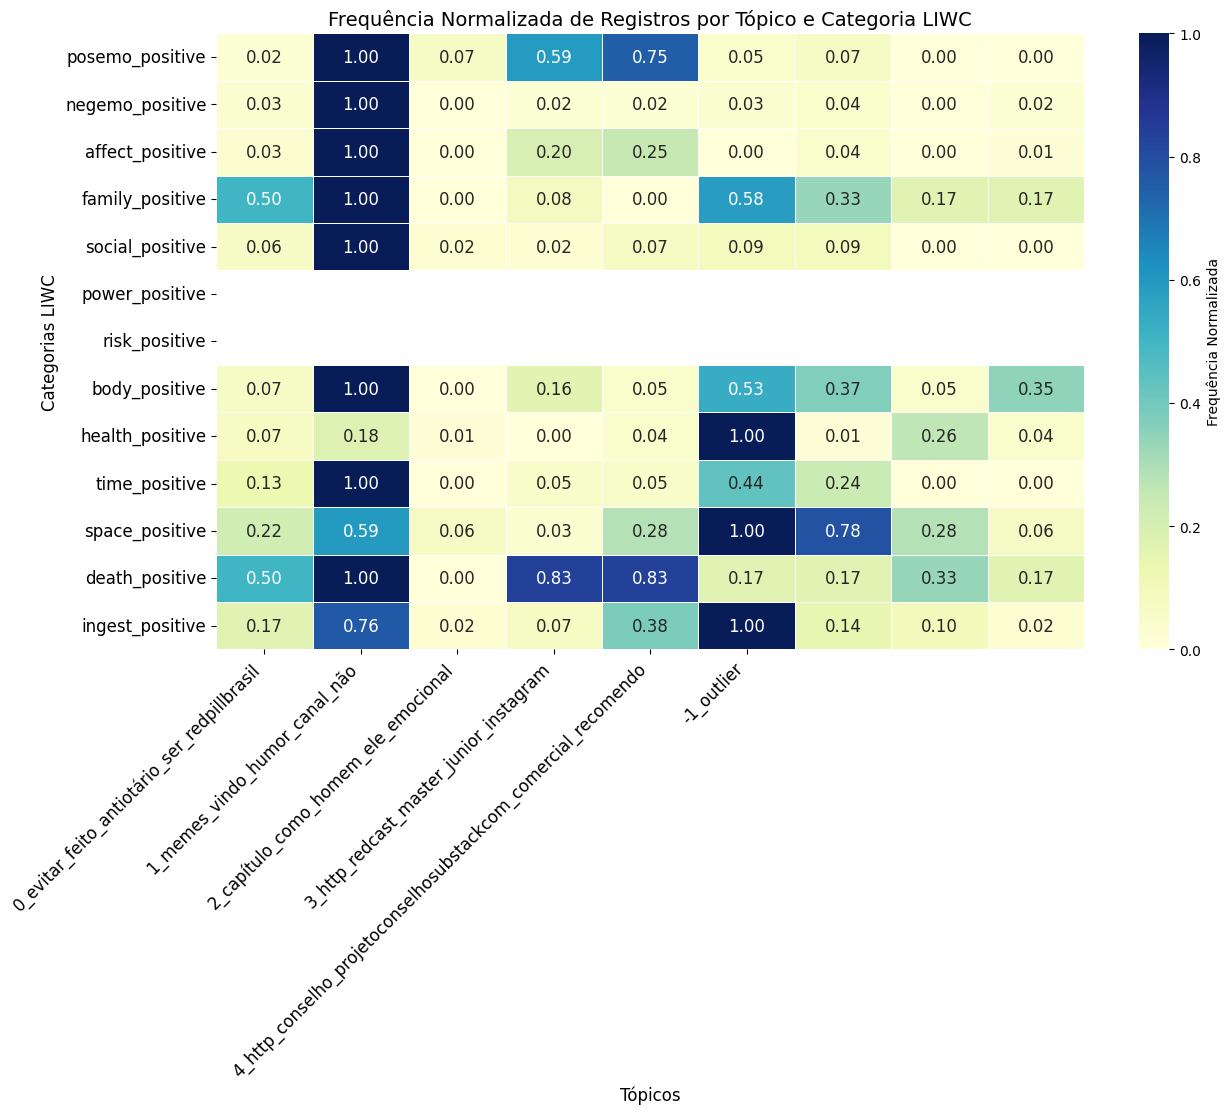

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt
from utils.save_models_and_variables import load_variable
import pandas as pd

categories = [
    "posemo_positive", "negemo_positive", "affect_positive",  # Emoções
    "family_positive", "social_positive",  # Relações
    "power_positive", "risk_positive",  # Domínio social
    "body_positive", "health_positive",  # Corpo e saúde
    "time_positive", "space_positive",  # Tempo e espaço
    "death_positive", "ingest_positive"  # Ações
]

topic_names_dict = load_variable(f'{results_folder}/topics_dict')

# Convertendo os tópicos para uma lista de strings para garantir a ordenação correta
topics = [f"{key}_{topic_names_dict[key]}" for key in topic_names_dict.keys()]

# Criando a matriz de contagem para todas as categorias por tópico
counts_matrix = {}

for category in categories:
    # Contabilizando a soma de cada categoria por tópico
    counts_matrix[category] = texts_df.groupby('topic')[category].sum()

# Convertendo o dicionário para um DataFrame
df_counts = pd.DataFrame(counts_matrix)

# Normalizando os valores entre 0 e 1
df_normalized = df_counts.div(df_counts.max(axis=0), axis=1)

# Transpondo a matriz para ter os tópicos no eixo Y
df_normalized = df_normalized.T

# Criando o heatmap com a matriz de contagem normalizada
plt.figure(figsize=(14, 8))
ax = sns.heatmap(df_normalized, cmap="YlGnBu", annot=True, fmt=".2f", 
                 linewidths=0.5, cbar_kws={'label': 'Frequência Normalizada'}, 
                 xticklabels=topics, annot_kws={"size": 12})  # Ajustando tamanho da fonte dos valores

# Ajustando os rótulos
plt.yticks(rotation=0, fontsize=12)  # Mantém os rótulos do eixo Y sem rotação e com fonte maior
plt.xticks(rotation=45, ha="right", fontsize=12)  # Inclina os rótulos do eixo X para 45 graus
plt.title("Frequência Normalizada de Registros por Tópico e Categoria LIWC", fontsize=14)
plt.ylabel("Categorias LIWC", fontsize=12)
plt.xlabel("Tópicos", fontsize=12)

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from utils.save_models_and_variables import load_variable

categories = [
    "posemo_positive", "negemo_positive", "affect_positive",  # Emoções
    "family_positive", "social_positive",  # Relações
    "power_positive", "risk_positive",  # Domínio social
    "body_positive", "health_positive",  # Corpo e saúde
    "time_positive", "space_positive",  # Tempo e espaço
    "death_positive", "ingest_positive"  # Ações
]

# topic_names_dict = load_variable(f'{results_folder}/topics_dict')

# # Convertendo os tópicos para uma lista de strings para garantir a ordenação correta
# topics = [f"{key}_{topic_names_dict[key]}" for key in topic_names_dict.keys()]

# Criando a matriz de contagem para todas as categorias por tópico
counts_matrix = {}

for category in categories:
    # Contabilizando a soma de cada categoria por tópico
    counts_matrix[category] = texts_df.groupby('channel_id')[category].sum()

# Convertendo o dicionário para um DataFrame
df_counts = pd.DataFrame(counts_matrix)

# Normalizando os valores entre 0 e 1
df_normalized = df_counts.div(df_counts.max(axis=0), axis=1)

# Transpondo a matriz para ter os tópicos no eixo Y
df_normalized = df_normalized.T

# Criando o heatmap com a matriz de contagem normalizada
plt.figure(figsize=(14, 8))
ax = sns.heatmap(df_normalized, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Frequência Normalizada'})

# Ajustando os rótulos
plt.yticks(rotation=0)  # Ajusta os rótulos do eixo Y para não rotacionar
plt.xticks(rotation=45, ha="right")
plt.title("Frequência Normalizada de Registros por Jornal e Categoria LIWC")
plt.ylabel("Categorias LIWC")
plt.xlabel("Jornal")

plt.show()

KeyError: 'news_channel_id'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from utils.save_models_and_variables import load_variable

categories = [
    "posemo_positive", "negemo_positive", "affect_positive",  # Emoções
    "family_positive", "social_positive",  # Relações
    "power_positive", "risk_positive",  # Domínio social
    "body_positive", "health_positive",  # Corpo e saúde
    "time_positive", "space_positive",  # Tempo e espaço
    "death_positive", "ingest_positive"  # Ações
]

topic_names_dict = load_variable(f'{results_folder}/topics_dict')

# Convertendo os tópicos para uma lista de strings para garantir a ordenação correta
topics = [f"{key}_{topic_names_dict[key]}" for key in topic_names_dict.keys()]

# Criando a matriz de contagem para todas as categorias por tópico
counts_matrix = {}

for category in categories:
    # Contabilizando a soma de cada categoria por tópico
    counts_matrix[category] = texts_df.groupby('id_source')[category].sum()

# Convertendo o dicionário para um DataFrame
df_counts = pd.DataFrame(counts_matrix)

# Normalizando os valores entre 0 e 1
df_normalized = df_counts.div(df_counts.max(axis=0), axis=1)

# Transpondo a matriz para ter os tópicos no eixo Y
df_normalized = df_normalized.T

# Criando o heatmap com a matriz de contagem normalizada
plt.figure(figsize=(14, 8))
ax = sns.heatmap(df_normalized, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Frequência Normalizada'}, xticklabels=['Portais', 'YouTube'])

# Ajustando os rótulos
plt.yticks(rotation=0)  # Ajusta os rótulos do eixo Y para não rotacionar
plt.xticks(rotation=45, ha="right")
plt.title("Frequência Normalizada de Registros por Tópico e Categoria LIWC")
plt.ylabel("Categorias LIWC")
plt.xlabel("Plataformas")

plt.show()

## Significância Estatística

In [ ]:
import pandas as pd
import scipy.stats as stats

# Supondo que texts_df já esteja carregado e contenha as colunas necessárias

# Lista das colunas booleanas
boolean_columns = [
    'posemo_positive', 'negemo_positive', 'affect_positive',
    'family_positive', 'social_positive', 'power_positive',
    'achievement_positive', 'material_positive', 'cognitive_positive',
    'risk_positive', 'body_positive', 'health_positive', 'time_positive',
    'space_positive', 'religion_positive', 'death_positive'
]

# Lista das colunas categóricas para comparação com polarity e subjectivity
categorical_columns = ["topic", "channel_id"]

# Teste Qui-Quadrado para relações entre variáveis categóricas
def chi_square_test(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    return chi2, p

# ANOVA para comparar médias de polaridade e subjetividade entre grupos
def anova_test(df, group_col, value_col):
    groups = [group[value_col].dropna() for name, group in df.groupby(group_col)]
    
    # Verificar se há pelo menos dois grupos
    if len(groups) > 1:
        f_stat, p_value = stats.f_oneway(*groups)
        return f_stat, p_value
    else:
        return None, None

# Correlação de Spearman para variáveis numéricas
def spearman_correlation(df, col1, col2):
    rho, p = stats.spearmanr(df[col1], df[col2])
    return rho, p

# Lista para armazenar os resultados
results = []

# Qui-quadrado: relação entre as colunas booleanas e outras variáveis categóricas
for col in boolean_columns:
    for categorical_col in categorical_columns:
        chi2, p = chi_square_test(texts_df, col, categorical_col)
        results.append(["Qui-Quadrado", col, categorical_col, chi2, p])

# ANOVA: diferenças nas médias de polaridade e subjetividade entre as colunas booleanas e categóricas
for col in boolean_columns + categorical_columns:
    for numeric_col in ["polarity", "subjectivity"]:
        f_stat, p = anova_test(texts_df, col, numeric_col)
        if f_stat is not None:
            results.append(["ANOVA", col, numeric_col, f_stat, p])

results_df = pd.DataFrame(results, columns=["Teste", "Variável", "Comparação", "Estatística", "p-valor"])

In [ ]:
# Definir o nível de significância
alpha = 0.05  

# Filtrar apenas os valores estatisticamente significativos
# significant_results = results_df[results_df["p-valor"] < alpha]
significant_results = results_df[results_df["Comparação"] == 'news_topic']

significant_results

In [ ]:
# Filtrar apenas os valores estatisticamente significativos
significant_results = results_df #[results_df["p-valor"] < alpha]
significant_results = significant_results[significant_results["Comparação"] == 'news_channel_id']

significant_results


In [ ]:
significant_results = results_df #[results_df["p-valor"] < alpha]
significant_results = significant_results[significant_results["Comparação"] == 'id_source']
significant_results